
## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов. Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.

Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ipywidgets import interact, IntSlider


%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('/Users/konansul/Desktop/course-ml/DATA/sonar.all-data.csv')

In [5]:
data

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [13]:
# R = 0
# M = 1

data['Label'] = data['Label'].map({'R': 0, 'M': 1})

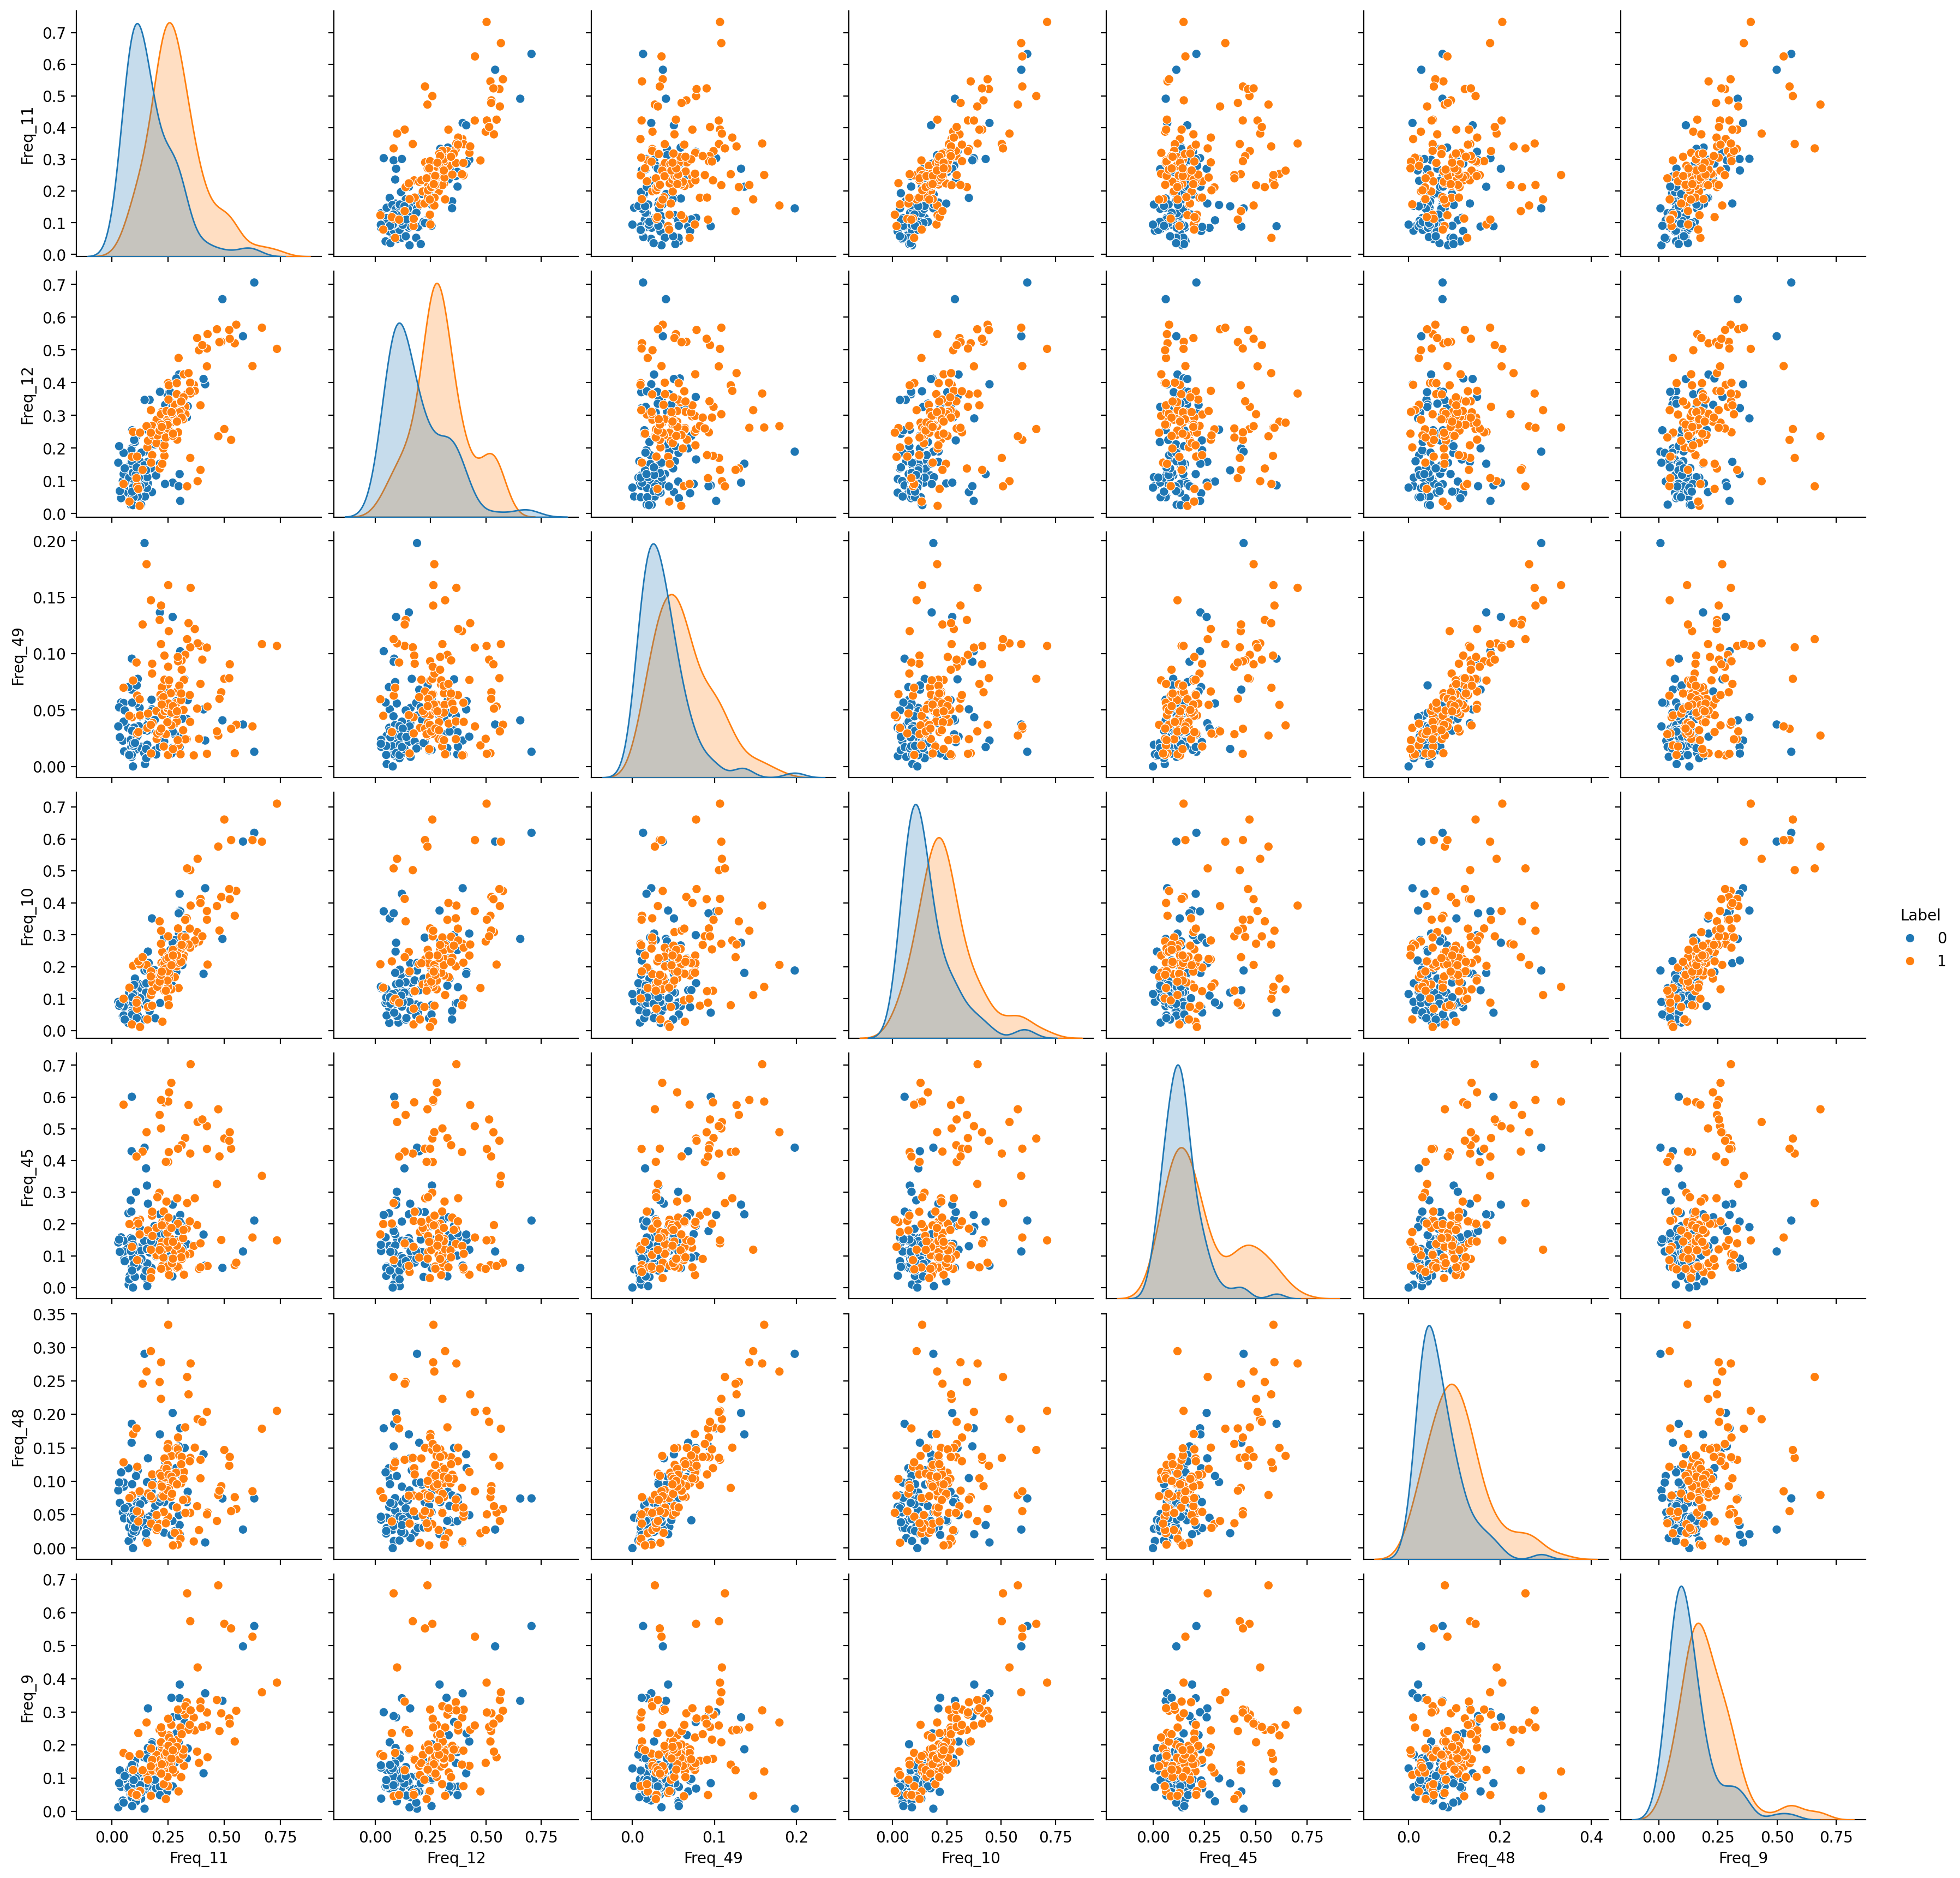

In [51]:
sns.pairplot(data[['Freq_11', 'Freq_12', 'Freq_49', 'Freq_10', 'Freq_45', 'Freq_48', 'Freq_9', 'Label']], hue = 'Label')

<Axes: >

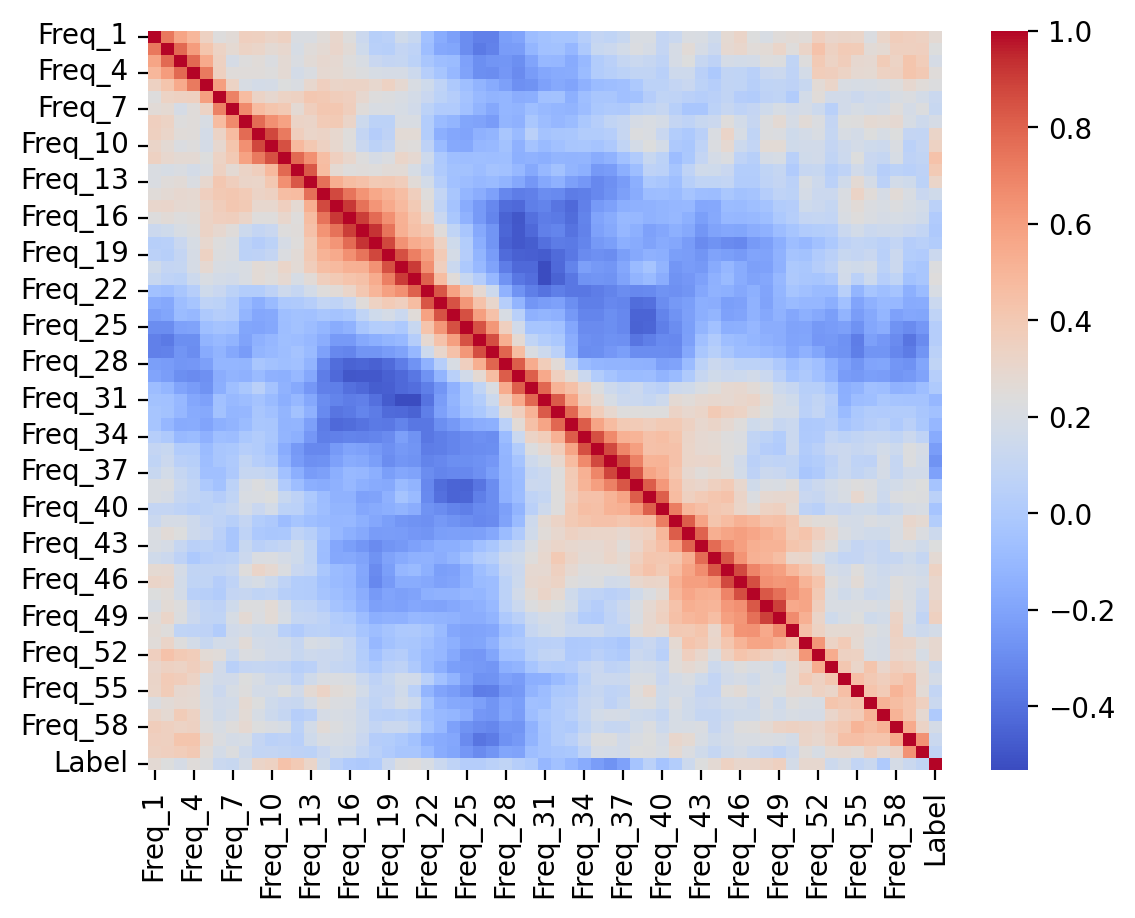

In [52]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

In [47]:
np.abs(data.corr()['Label']).sort_values()[45:]

Freq_36    0.269151
Freq_1     0.271694
Freq_44    0.273779
Freq_52    0.288651
Freq_51    0.293205
Freq_47    0.301697
Freq_46    0.305610
Freq_13    0.312811
Freq_9     0.321448
Freq_48    0.329333
Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

In [27]:
X = data.drop('Label', axis = 1)

In [28]:
y = data['Label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [30]:
scaler = StandardScaler()

In [33]:
knn = KNeighborsClassifier()

In [34]:
operations = [('scaler', scaler), ('knns', knn)]

In [35]:
pipeline = Pipeline (operations)

In [37]:
k_values = list(range(1, 100))

In [41]:
parameter_grid = {'knns__n_neighbors': k_values}

In [42]:
grid_model = GridSearchCV(pipeline, parameter_grid, cv = 10, scoring = 'accuracy')

In [43]:
grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knns__n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [44]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knns', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knns': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knns__algorithm': 'auto',
 'knns__leaf_size': 30,
 'knns__metric': 'minkowski',
 'knns__metric_params': None,
 'knns__n_jobs': None,
 'knns__n_neighbors': 1,
 'knns__p': 2,
 'knns__weights': 'uniform'}

In [59]:
grid_model.cv_results_['param_knns__n_neighbors'][:20]

masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                   17, 18, 19, 20],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=999999)

In [60]:
grid_model.cv_results_['mean_test_score'][:20]

array([0.86111111, 0.82953216, 0.81812865, 0.8128655 , 0.78128655,
       0.79707602, 0.77602339, 0.77046784, 0.76023392, 0.72251462,
       0.71754386, 0.7502924 , 0.70643275, 0.72280702, 0.71140351,
       0.73304094, 0.71169591, 0.7122807 , 0.69532164, 0.70643275])

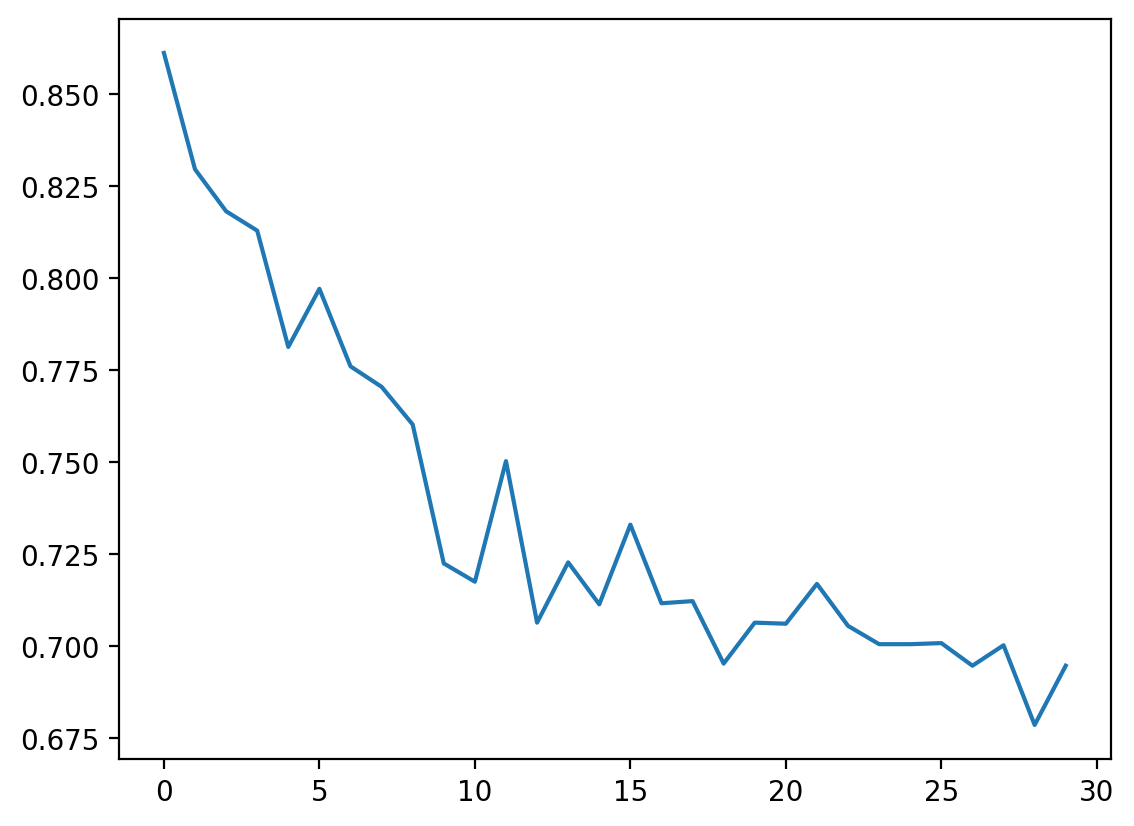

In [68]:
plt.plot(grid_model.cv_results_['mean_test_score'][:30])

In [70]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [75]:
y_pred = grid_model.predict(X_test)

In [76]:
def plot_metrics(model, x_test, y_test):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap = 'Blues', ax = axes[0])
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax = axes[1])
    PrecisionRecallDisplay.from_estimator(model, x_test, y_test, ax = axes[2])
    axes[0].set_title("Confusion Matrix")
    axes[1].set_title("ROC Curve")
    axes[2].set_title("Precision-Recall Curve")
    plt.tight_layout()
    plt.show()

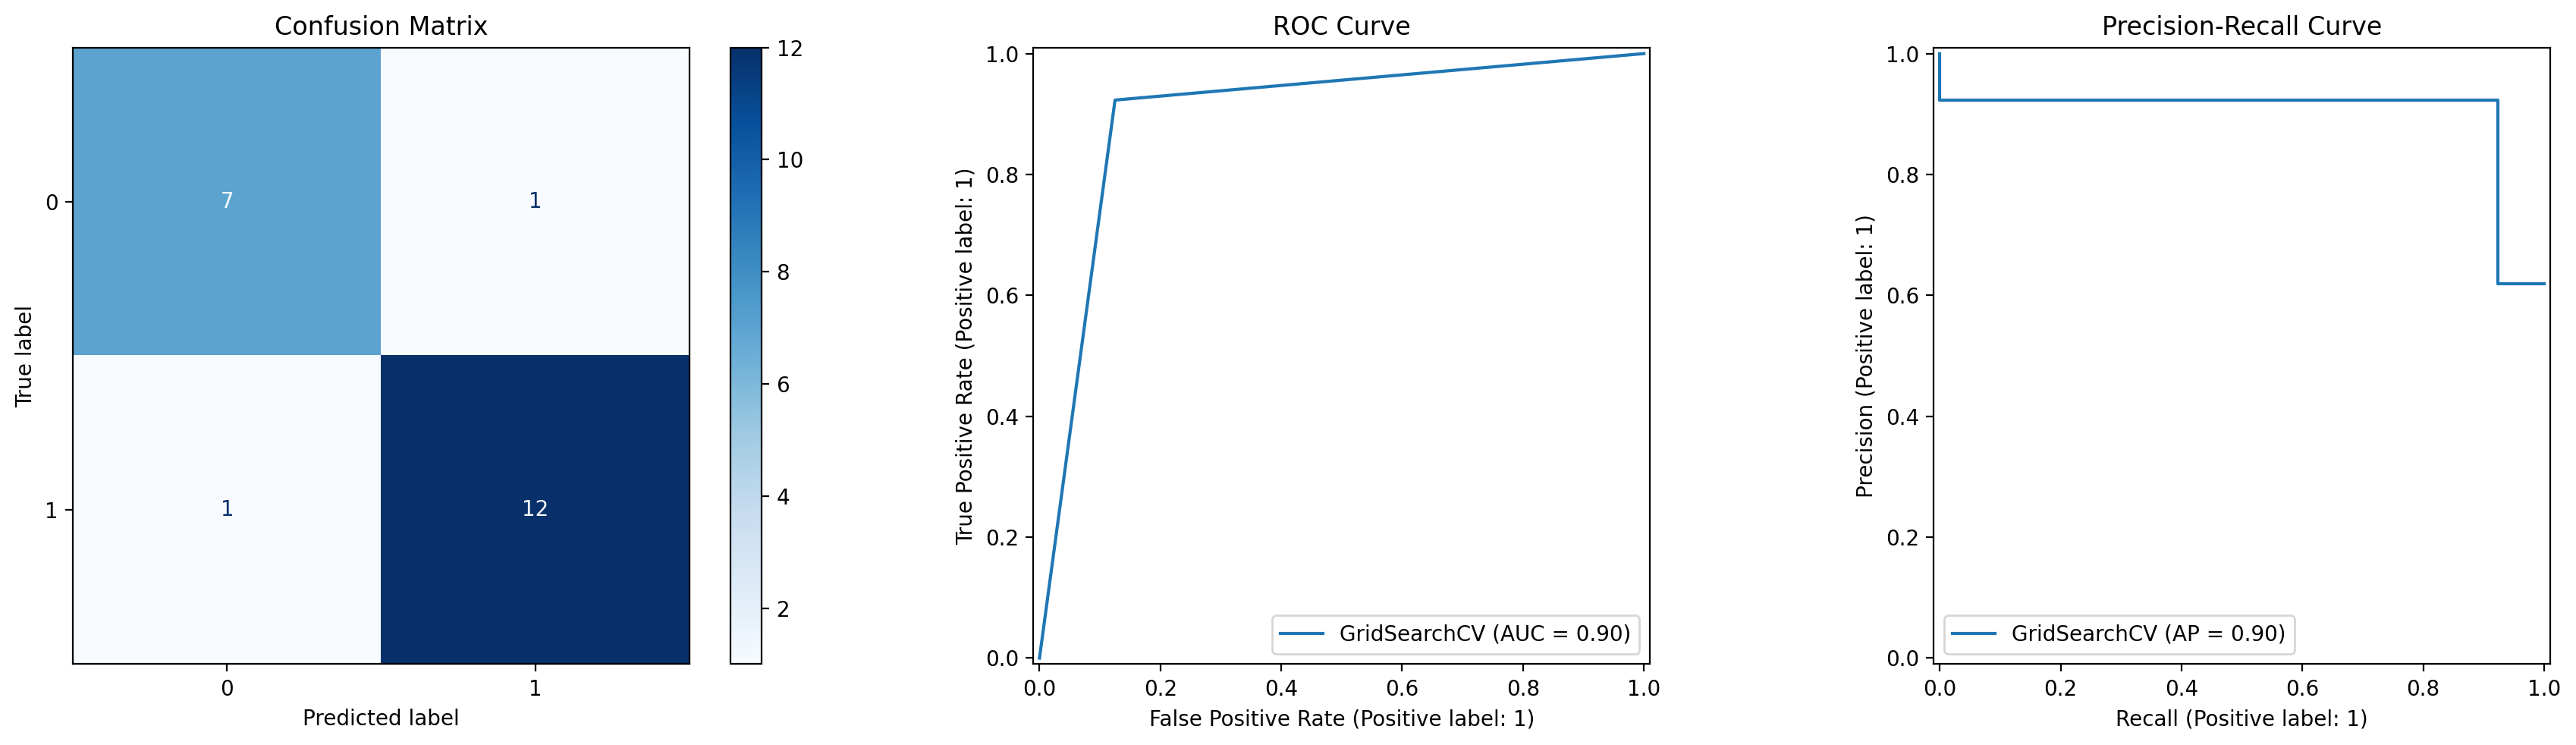

In [77]:
plot_metrics(grid_model, X_test, y_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

